## Week 5 Exercises

###<font color=green> Replace the name below with **your name**. For full credit, your total needs to add up to **60 points**.

## Vera Rubin

<font color=purple> *Vera Cooper Rubin, 1928 - 2016, American Astronomer at the Carnegie Institution whose observations of the rotational rates of galaxies uncovered evidence of **dark matter**. She showed that the rotational speeds of tiny portions of distant galaxies did not decrease as expected with distance from the center, but remained higher than expected, leading to the conclusion that there was a far greater mass in the galaxies than was visible. (Her daughter, Judith Young (1952 - 2014), was a Professor of Astronomy at UMass Amherst).*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
from numpy import sqrt, pi, sin, cos, log, e

In [3]:
'''import matplotlib as mat
mat.use("TkAgg")'''
#Use to create the plot as a seperate tab

'import matplotlib as mat\nmat.use("TkAgg")'

**1. Make a 3D surface plot: atomic orbital.**

a. *(5 points)* Read the 3D Plotting section in the \emph{Getting started with Plotting and Graphics} handout to do this problem.

The ``wave function'' of the electron in a hydrogren atom in the quantum state $n=3$, $\ell=1$, $m=0$ is given by
$$
	\psi(x,y) = x(6-r)e^{-r/3}
$$
where $r=\sqrt{x^2+y^2}$.  Here all distances $x,y,r$ are measured in units of the Bohr radius $a_0 = 5.29\times 10^{-11}$ m.
(The greek letter $\psi$ (psi) is often used for quantum wave functions.)

Define a function to compute $\psi(x,y)$ and make a 3D surface plot of $\psi(x,y)$ over the range ${-20<x<20}$, $-20<y<20$.
If your program is successful, you should see that $\psi(x,y)$ has two large peaks on the $y$ axis (one up  and one down) and two much shallower, wider maxima a bit further out.

Be sure to label your axes and provide a title for your plot.
Set the $z$ label to $\psi(x,y)$ using LaTeX.

*Optional:* If using an IDE such as Spyder,  display your 3D plot in a separate window, and use your mouse to rotate it.
Then, save it to a file and check that you can open up this picture file.

b. *(5 points)*	Use a density plot to show the same $\psi(x,y)$ -- that is, an image that is colored according to the value of $\psi$.  Use `plt.colorbar()` in your plot. Discuss in a markdown cell how the 3D and density plots compare.


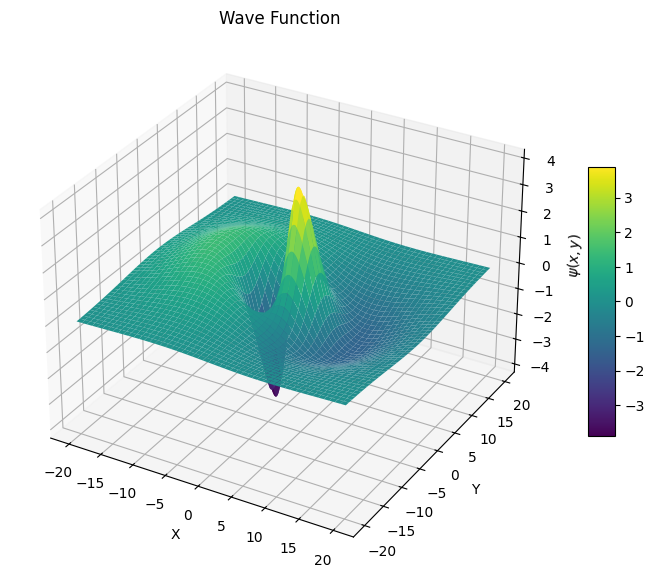

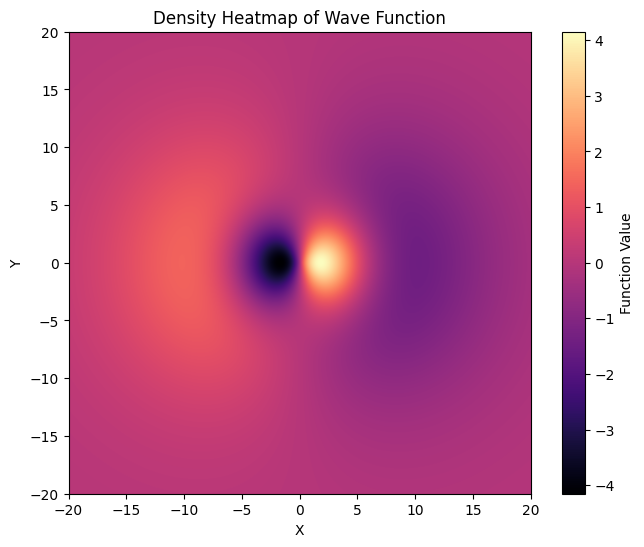

In [4]:
def wave(x, y):
    r = sqrt(x*x + y*y)
    return (x)*(6-r)*(e**(-r/3))

X = np.linspace(-20, 20, 1000)
Y = np.copy(X)
X, Y  = np.meshgrid(X, Y)
Z = wave(X, Y)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel(r"${\psi(x, y)}$")
ax.set_title("Wave Function")

#ax.view_init(elev=20, azim=5)
plt.show()

plt.figure(figsize=(8, 6))
plt.imshow(Z, extent=[-20, 20, -20, 20], origin='lower', cmap='magma')
plt.colorbar(label='Function Value')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Density Heatmap of Wave Function')

plt.show()


**2. Make a 3D scatter plot: points on a sphere.** *(10 points)*

The conversion between standard spherical coordinates $r,\theta,\phi$ and cartesian coordinates $x,y,z$ is
\begin{align*}
x &= r\sin\theta\cos\phi, \\
y &= r\sin\theta\sin\phi, \\
z &= r\cos\theta.
\end{align*}

Here the radius must obey $r\geq 0$, the polar angle $\theta$ must obey $0 \leq \theta \leq \pi$, and the azimuthal angle $\phi$ must obey $0 \leq \phi \leq 2\pi$.

Make a plot of some points on the surface of a sphere, as follows:
Set $r$ to a fixed value of your choosing.
Start with empty lists for the $x$, $y$ and $z$ coordinates of your points (for example, set `xlist = []`, etc.)
Then use nested `for` statements to vary $\theta$ over $N$ values covering its allowed range, and similarly vary $\phi$ over $N$ points (for example, you can use `for theta in np.linspace(0,pi,nn):`).
For each of these $N^2$ points calculate $x,y,z$ and append to the lists.
Make a 3D scatter plot of the resulting points.  Start with $N=20$ then increase $N$ once your program is working.

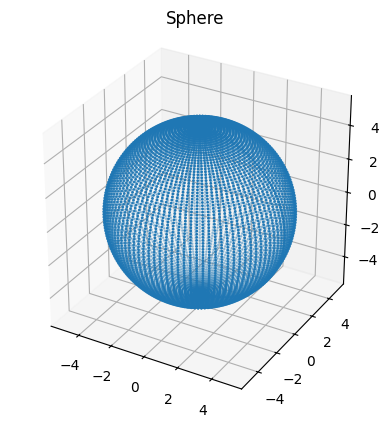

In [5]:
def sphere(n, r):
    xlist = []
    zlist = []
    ylist = []
    theta_list = np.linspace(0, pi, n)
    phi_list = np.linspace(0, 2*pi, n)
    for theta in theta_list:
        for phi in phi_list:
            xlist.append(r*sin(theta)*cos(phi))
            ylist.append(r*sin(theta)*sin(phi))
            zlist.append(r*cos(theta))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    ax.set_aspect('equal')
    ax.scatter(xlist, ylist, zlist, s=1)
    ax.set_title("Sphere")
    plt.show()
sphere(100, 5)
    

**3. Radioactive decay: plotting and uncertainty**

Two data files, `decay1.txt` and `decay2.txt`, contain simulated data for measurements of the lifetime of the radioactive isotope $^{116}$In (this experiment is done in Physics 286).
The usual model for such data has the form of an exponential decay:
$$
	N(t) = N_0 e^{-t/\tau} + B
$$
where $N(t)$ represents the number of measured counts per minute at time $t$ after the experiment is started.
$N_0$ is the initial counting rate, $\tau$ is the $^{116}$ In lifetime, and $B$ the background counting rate -- or the counting rate observed when the $^{116}$ In source is removed.
The objective of the experiment is to measure the lifetime $\tau$ as precisely as possible.

(a) *(10 points)* First read in the two data sets, which are not of the same length, and store them in arrays. Because this counting data is generated randomly, we can estimate the uncertainty (different for every data point $N_j$) as $\sigma_j = \sqrt{N_j}$.
Use this to create an array of $\sigma_j$'s corresponding to each of the two data sets, and plot the data with these $\sigma_j$'s as error bars. Use different symbols for each, and use a legend.

(b) *(5 points)* The error bars should be bigger near the start of each plot. Why is this? Now, make the $N$ axis (i.e., the y-axis) of your $N(t)$ plots logarithmic.  Both plots should look like straight lines, and the error bars should be bigger near the ends of the plots. Why is this? Explain these observations in a docstring/markdown cell.

In [6]:
decay1 = np.loadtxt('decay1.txt', skiprows= 1)
decay2 = np.loadtxt('decay2.txt', skiprows= 1)

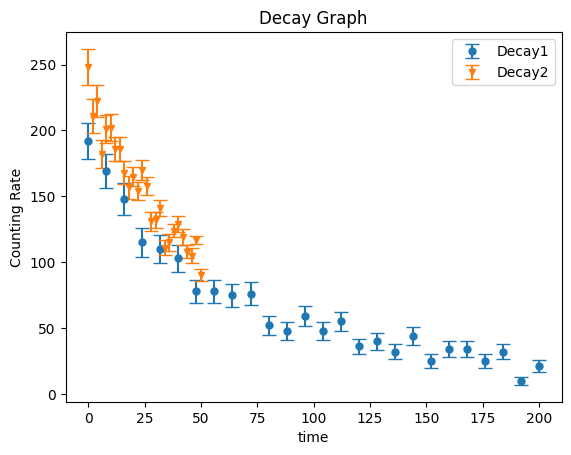

In [7]:
nj1 = decay1[:, 1]
t1 = decay1[:, 0]
n01 = decay1[0,1]
sigmaN1 = sqrt(nj1)

nj2 = decay2[:, 1]
t2 = decay2[:, 0]
n02 = decay2[0,1]
sigmaN2 = sqrt(nj1)
plt.figure()
plt.errorbar(t1, nj1, sigmaN1, fmt='o', markersize=5, capsize=5, label="Decay1")
plt.errorbar(t2, nj2, sigmaN2, fmt='v', markersize=5, capsize=5, label="Decay2")
plt.legend()
plt.title("Decay Graph")
plt.xlabel("time")
plt.ylabel("Counting Rate")
plt.show()


The errorbars are going to be bigger near the start because we are taking the square root of the counting rate for error bars, and the counting rate goes down with time

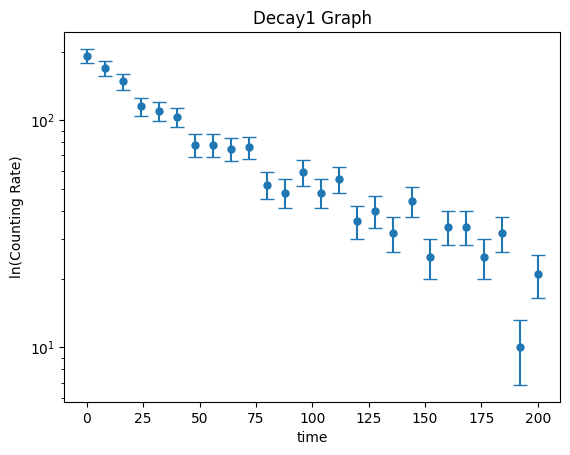

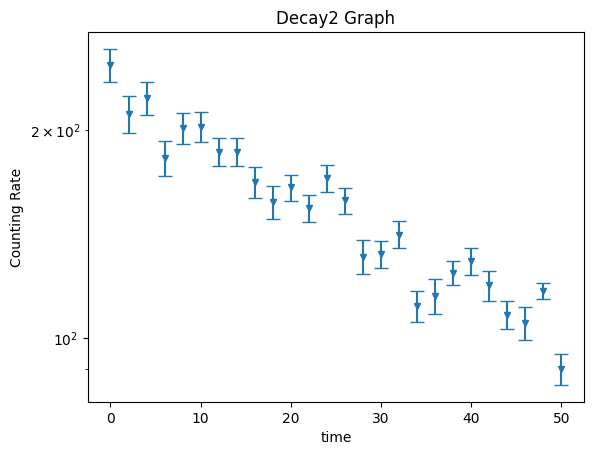

In [8]:
plt.figure()
plt.errorbar(t1, nj1, sigmaN1, fmt='o', markersize=5, capsize=5, label="Decay1")
plt.yscale('log')
plt.title("Decay1 Graph")
plt.xlabel("time")
plt.ylabel("ln(Counting Rate)")
plt.show()
plt.figure()
plt.errorbar(t2, nj2, sigmaN2, fmt='v', markersize=5, capsize=5, label="Decay2")
plt.yscale('log')
plt.title("Decay2 Graph")
plt.xlabel("time")
plt.ylabel("Counting Rate")
plt.show()

The error bars are also scaled logarithmically. This means that the same unit length corresponds to an orders of magnitude greater error as you get to higher values of y. 

**4. Radioactive decay - fitting the data**

Fit the model defined in Problem 3 to each of the two data sets, in two different ways:

(a) *(5 points)* Do a **three-parameter** fit, with $N_0$, $\tau$, and $B$ all determined by the fit. For both sets of data, show the data set as a set of symbols with error bars, and show the fits as lines that have the same color as the data points.

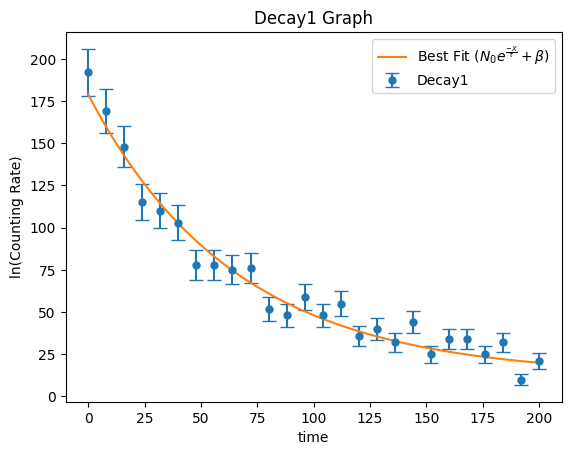

12.15875311700223
5.160037101066045
54.84990396819064
34.761669336518516


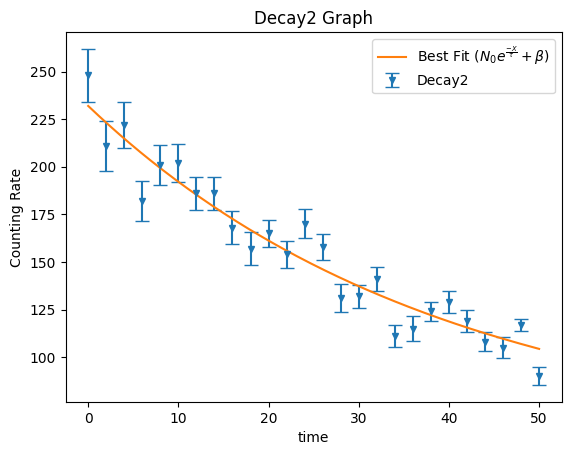

In [9]:
def decayCurve(X, n0, tau, B):
    return(n0*(e**(-X/tau))+B)

initial_guess = [250, 25, 25]
(N01, tao1, B1), pcov = curve_fit(decayCurve, t1, nj1, p0 = initial_guess, sigma = sigmaN1)


XDecay1 = np.linspace(t1.min(), t1.max(), np.size(t1)*10)
YDecay1 = decayCurve(XDecay1, N01, tao1, B1)
perr = np.sqrt(np.diag(pcov))
plt.figure()
plt.errorbar(t1, nj1, sigmaN1, fmt='o', markersize=5, capsize=5, label="Decay1")
plt.plot(XDecay1, YDecay1, label = r"Best Fit ($N_{0}e^{\frac{-X}{\tau}}+\beta$)")
plt.legend()
plt.title("Decay1 Graph")
plt.xlabel("time")
plt.ylabel("ln(Counting Rate)")
plt.show()
print(B1)
print(perr[2])

(N02, tao2, B2), pcov = curve_fit(decayCurve, t2, nj2, p0 = initial_guess, sigma = sigmaN2)
XDecay2 = np.linspace(t2.min(), t2.max(), np.size(t2)*10)
YDecay2 = decayCurve(XDecay2, N02, tao2, B2)
print(B2)
perr = np.sqrt(np.diag(pcov))
print(perr[2])


plt.figure()
plt.errorbar(t2, nj2, sigmaN2, fmt='v', markersize=5, capsize=5, label="Decay2")
plt.plot(XDecay2, YDecay2, label = r"Best Fit ($N_{0}e^{\frac{-X}{\tau}}+\beta$)")
plt.legend()
plt.title("Decay2 Graph")
plt.xlabel("time")
plt.ylabel("Counting Rate")
plt.show()

(b) *(5 points)* Assume a separate experiment has been done without the $^{116}$In source present to measure $B =$ 25 cts/min.
Fix $B$ at this value, and do a **two-parameter** fit with $N_0$ and $\tau$ as the fitting parameters. Once again, for both data sets, show the data as symbols with error bars, and show the fits as lines that have the same color as the corresponding data points.  

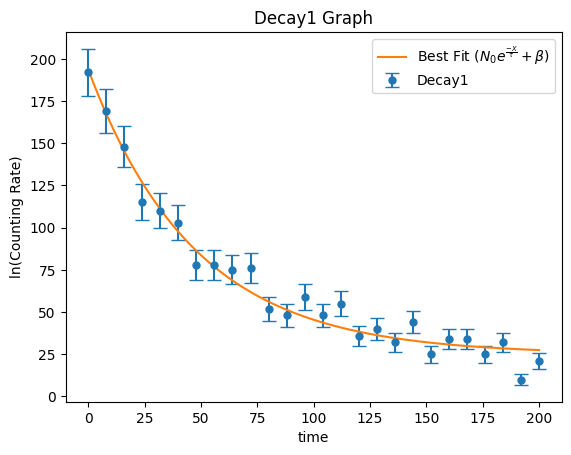

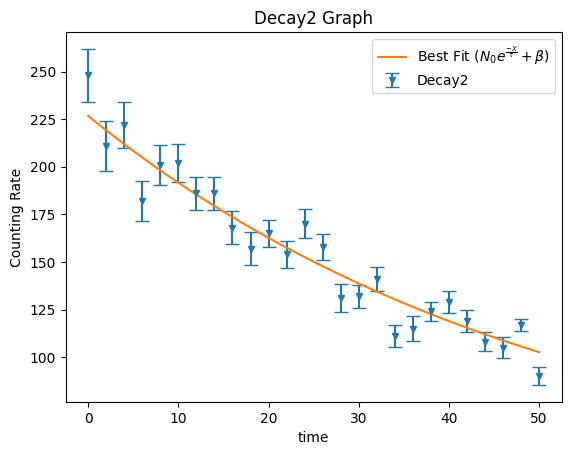

In [10]:
def decayCurve(X, n0, tau):
    return(n0*(e**(-X/tau))+25)

initial_guess = np.ones(2)
(N01B, tao1B), pcov = curve_fit(decayCurve, t1, nj1, p0 = initial_guess, sigma = sigmaN1)


XDecay1 = np.linspace(t1.min(), t1.max(), np.size(t1)*10)
YDecay1 = decayCurve(XDecay1, N01B, tao1B)
plt.figure()
plt.errorbar(t1, nj1, sigmaN1, fmt='o', markersize=5, capsize=5, label="Decay1")
plt.plot(XDecay1, YDecay1, label = r"Best Fit ($N_{0}e^{\frac{-X}{\tau}}+\beta$)")
plt.legend()
plt.title("Decay1 Graph")
plt.xlabel("time")
plt.ylabel("ln(Counting Rate)")
plt.show()


(N02B, tao2B), pcov = curve_fit(decayCurve, t2, nj2, p0 = initial_guess, sigma = sigmaN2)
XDecay2 = np.linspace(t2.min(), t2.max(), np.size(t2)*10)
YDecay2 = decayCurve(XDecay2, N02B, tao2B)


plt.figure()
plt.errorbar(t2, nj2, sigmaN2, fmt='v', markersize=5, capsize=5, label="Decay2")
plt.plot(XDecay2, YDecay2, label = r"Best Fit ($N_{0}e^{\frac{-X}{\tau}}+\beta$)")
plt.legend()
plt.title("Decay2 Graph")
plt.xlabel("time")
plt.ylabel("Counting Rate")
plt.show()

(c) *(5 points)* **For each of these four fits** (two data sets, two ways), output the result for $\tau$ and its uncertainty, and compare with the accepted value $\tau = 54.3$ min. Also compute and compare the $\chi_r^2$ for the two fits. Which fit works best for the first data set? Which for the second? Respond in a markdown cell.

You should find that the data set covering a longer time works well whether or not $B$ is determined separately, but the shorter time data set works much better with a separately-determined $B$. Why is this?

In [11]:
def decayCurve(X, n0, tau, B):
    return(n0*(e**(-X/tau))+B)

def decayRedChi2(x1, y1, error, one = False, b=False, t = False):
    x1 = np.asarray(x1)
    y1 = np.asarray(y1)
    if not(b or t):
        if(one):
            initialGuess = [250, 25, 100]
            popt, pcov = curve_fit(decayCurve, x1, y1, p0 = initialGuess, sigma = error)
            yFit = np.array(decayCurve(x1, *popt))
            Tau = popt[1]
            print(popt)
        if not(one):
            initialGuess = [195,100,10]
            popt, pcov = curve_fit(decayCurve, x1, y1, p0 = initialGuess, sigma = error)
            yFit = np.array(decayCurve(x1, *popt))
            Tau = popt[1]
            print(popt)
    if b:
        if one:
            initialGuess = [250, 25]
            def decayB(X, n0, tau):
                return(n0*(e**(-X/tau))+25)
            popt, pcov = curve_fit(decayB, x1, y1, p0=initialGuess, sigma = error)
            yFit = np.array(decayB(x1, *popt))
            Tau = popt[1]
        else:
            initialGuess = [195, 100]
            def decayB(X, n0, tau):
                return(n0*(e**(-X/tau))+25)
            popt, pcov = curve_fit(decayB, x1, y1, p0=initialGuess, sigma = error)
            yFit = np.array(decayB(x1, *popt))
            Tau = popt[1]
    if t:
        initialGuess = np.ones(2)
        def decayT(X, n0, B):
            return(n0*(e**(-X/54.3))+B)
        popt, pcov = curve_fit(decayT, x1, y1, p0 = initialGuess, sigma = error)
        yFit = np.array(decayT(x1, *popt))

    residuals = (y1 - yFit)/error
    dof = len(x1) - 3
    chi2 = np.sum(residuals*residuals)
    redChi2 = chi2/dof
    if not(t):
        return redChi2, Tau
    else:
        return redChi2

noPreB1, tauNoPreB1 = decayRedChi2(t1, nj1, sigmaN1)
preB1, tauPreB1 = decayRedChi2(t1, nj1, sigmaN1, one=True, b=True)
print(f"The reduced chi squared of decay 1 without a predetermined B is: {noPreB1} \nTau is {tauNoPreB1}")
print(f"The reduced chi squared of decay 1 with a predetermined B is: {preB1} \nTau is {tauPreB1} \n")

noPreB2, tauNoPreB2 = decayRedChi2(t2, nj2, sigmaN2)
preB2, tauPreB2 = decayRedChi2(t2, nj2, sigmaN2, b=True)
print(f"The reduced chi squared of decay 2 without a predetermined B is: {noPreB2} \nTau is {tauNoPreB2}")
print(f"The reduced chi squared of decay 2 with a predetermined B is: {preB2} \nTau is {tauPreB2}")

print("\n")
print(f"The reduced chi squared of decay 1 with a predetermined Tau is: {decayRedChi2(t1, nj1, sigmaN1, t=True)}")
print(f"The reduced chi squared of decay 2 without a predetermined Tau is: {decayRedChi2(t2, nj2, sigmaN2, t=True)}")

[166.68820087  65.2057575   12.15873691]
The reduced chi squared of decay 1 without a predetermined B is: 1.6800353555574086 
Tau is 65.20575750079018
The reduced chi squared of decay 1 with a predetermined B is: 2.3395353039536646 
Tau is 47.36505617874257 

[177.0684347   39.22620761  54.84990586]
The reduced chi squared of decay 2 without a predetermined B is: 2.7375910700792607 
Tau is 39.22620760786429
The reduced chi squared of decay 2 with a predetermined B is: 2.7871027234647356 
Tau is 52.36005667582828


The reduced chi squared of decay 1 with a predetermined Tau is: 1.8127370181636662
The reduced chi squared of decay 2 without a predetermined Tau is: 2.797217662023737


**5. Parameter guesses in nonlinear fits.**
Try the 5-parameter (Gaussian + linear background) fit to the data in file `peak4.txt` used in the **Fitting models to data** handout by doing the following:

(a) *(5 points)* Start with initial parameter guesses that are all equal to 1, and see what happens. Starting with parameter values equal to 1 worked fine for a linear model like the polynomial (which has only one minimum in $\chi_r^2$) but you should find that it doesn't work here.

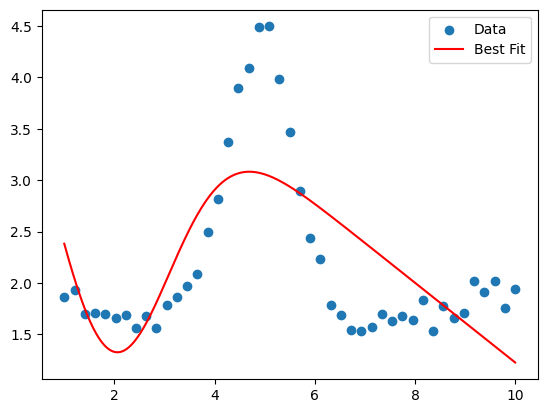

In [12]:
intGuess = np.ones(5)
peak4 = np.loadtxt('peak4.txt', skiprows = 1)
X = peak4[:, 0]
Y = peak4[:, 1]
plt.scatter(X, Y, label = 'Data')

def gaussianLinear(x,p0,p1,p2,p3,p4):
    return p0*np.exp(-(x-p1)**2/(2*p2**2)) + p3 + p4*x

popt, pcov = curve_fit(gaussianLinear, X, Y, p0 = intGuess)
xFit = np.linspace(min(X), max(X), np.size(X)*10)
yFit = gaussianLinear(xFit, *popt)
plt.plot(xFit, yFit, color = 'r', label = 'Best Fit')
plt.legend()

(b) *(5 points)* Which of the five initial parameter values is the non-linear least squares fitting most sensitive to? Change each initial parameter guess in turn to address this question.  What range of values of each allows you to successfully find the global minimum in $\chi_r^2$? Report your answer in a markdown cell. This points to the importance of having a good guess for a fitting model function.

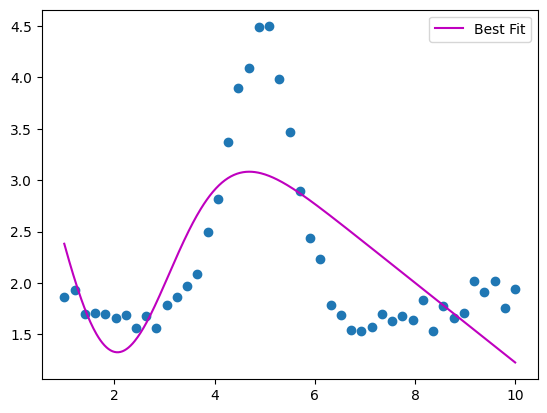

The reduced chi square for the initial guess, [5. 1. 1. 1. 1.], is 0.3919792523676587


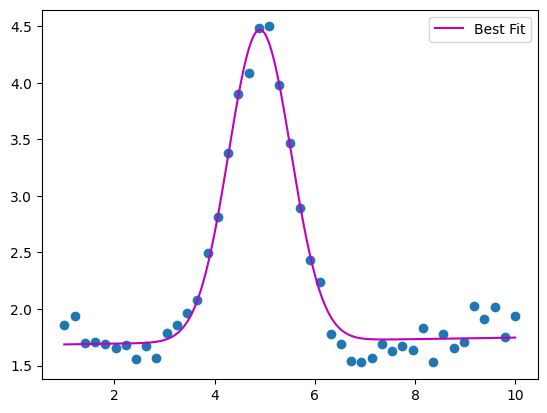

The reduced chi square for the initial guess, [1. 5. 1. 1. 1.], is 0.017569206012700046


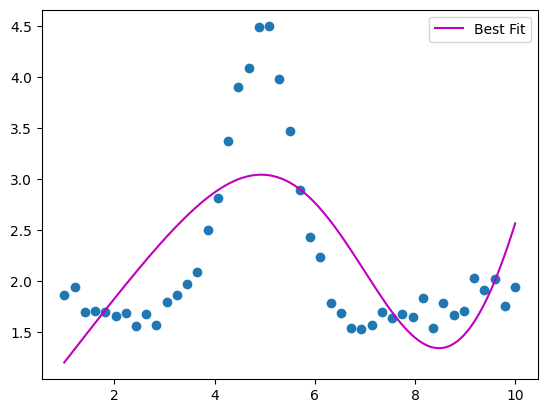

The reduced chi square for the initial guess, [1. 1. 5. 1. 1.], is 0.3926490350401473


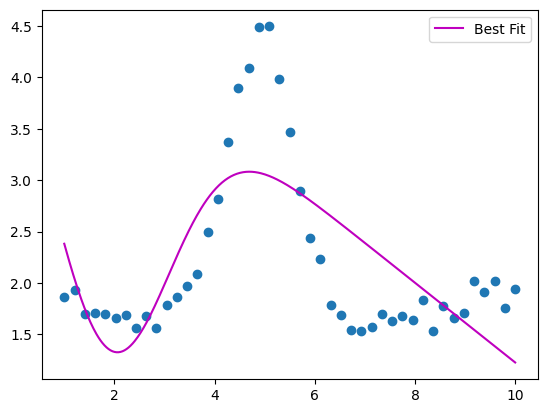

The reduced chi square for the initial guess, [1. 1. 1. 5. 1.], is 0.3919792520593187


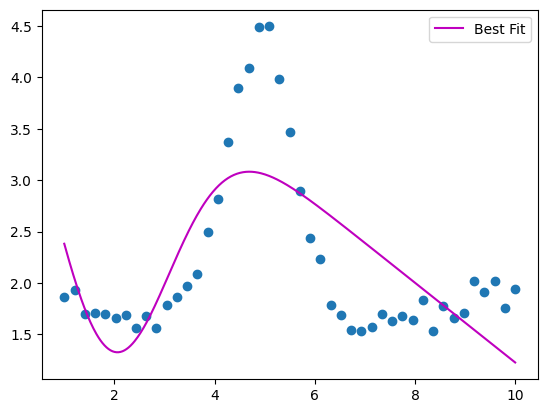

The reduced chi square for the initial guess, [1. 1. 1. 1. 5.], is 0.39197925319491234


In [13]:
def redChi2(x, y, error, curve, *popt):
    yfit = curve(x, *popt)
    residuals = (y - yfit) / error
    dof = len(x) - len(popt)
    chi2 = np.sum(residuals**2)
    redChi2 = chi2 / dof
    return redChi2

def gaussianPlot(X, Y, intGuess, gauss):
    popt, pcov = curve_fit(gauss, X, Y, p0=intGuess)
    xFit = np.linspace(min(X), max(X), np.size(X) * 10)
    yFit = gauss(xFit, *popt)
    
    plt.plot(xFit, yFit, color = 'm', label='Best Fit')
    plt.legend()
    plt.show()

    print(f"The reduced chi square for the initial guess, {intGuess}, is {redChi2(X, Y, np.ones(np.size(X)), gauss, *popt)}")

for i in range(5):
    intGuess = np.ones(5)
    intGuess[i]=5
    plt.scatter(X, Y)
    gaussianPlot(X, Y, intGuess, gaussianLinear)


The third parameter, the standard deviation, has the greatest change. This one mattered the most in the plotting. The width of the plot also changes the parameters significantly. It appears, that with greater values the center matters more, but with lower changes the standard deviation matters more. 


(c) *(5 points)* Fit the data in `peak4.txt` using one less parameter, so the model is a Gaussian plus a constant background. How does this fit perform in comparison to the linear background term used in the previous part? In each case, compare $\chi_r^2$.

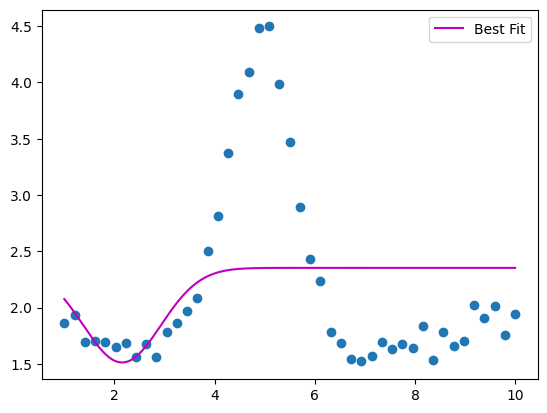

The reduced chi square for the initial guess, [3. 1. 1. 1.], is 0.6889838352130051


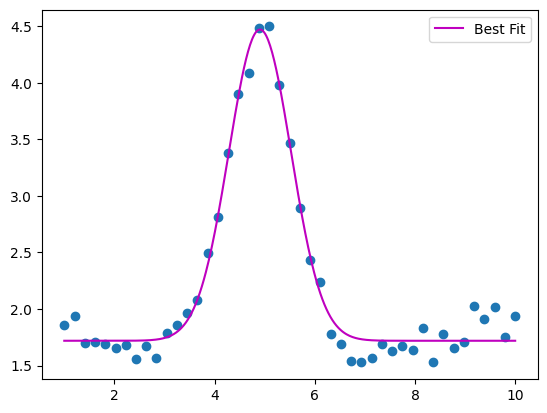

The reduced chi square for the initial guess, [1. 3. 1. 1.], is 0.01746886613469575


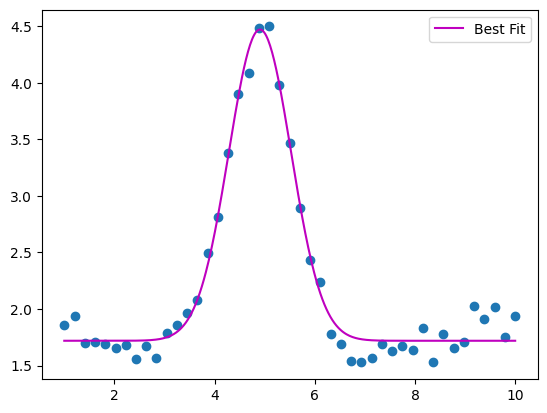

The reduced chi square for the initial guess, [1. 1. 3. 1.], is 0.017468866133917578


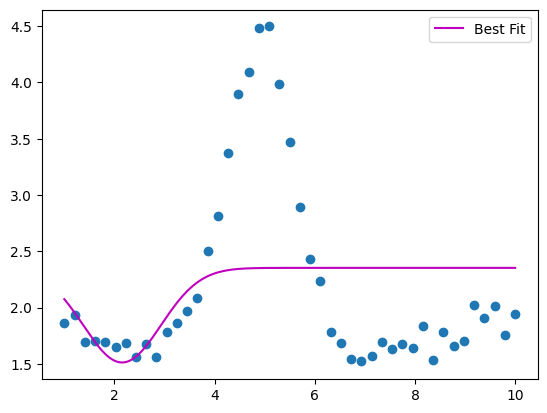

The reduced chi square for the initial guess, [1. 1. 1. 3.], is 0.6889838387311212


In [14]:
def gaussianConst(x,p0,p1,p2,p3):
    return p0*np.exp(-(x-p1)**2/(2*p2**2)) + p3
#def gaussianPlot(X, Y, intGuess, gauss):

intGuess = np.ones(4)
for i in range(4):
    intGuess = np.ones(4)
    intGuess[i]=3
    plt.scatter(X, Y)
    gaussianPlot(X, Y, intGuess, gaussianConst)



For all but the time that we change the standard deviation (or width depending on the size of the change), the reduced chi square of the linear background is lower than that of the constant. When we change the standard deviation (or width depending on the size of the change), however, they are equal. This changes when we don't make the guess 2. For example, if we try our initial guess is all ones with one 5 (the width), then the 2nd graph is better than the third graph, but still has the same reduced chi square as when we change the std to 2

**6. Gaussian vs Lorentzian fits**

The following two functions both describe peaks of height A and width w centered at $x_0$, with constant additive background B:

$$
f_\text{gauss}(x) =  A \exp(-[x-x_0]^2/2w^2) + B \\
f_\text {lorentz}(x) = \frac{A}{1 + [(x-x_0)/w]^2} + B.
$$

The first function $f_\text{gauss}(x)$ is the by-now familiar Gaussian peak.
The second function $f_\text {lorentz}(x)$ is called a Lorentzian - it occurs naturally in resonant phenomena such as optical transitions of atoms or damped driven harmonic oscillators.

(a) *(5 points)* Create two user-defined functions for the Gaussian and Lorentzian forms described above. The function definitions should include all four required parameters for each type of fit.

In [15]:
def gauss(x, A, x0, B, w):
    return A*np.exp((-(x-x0)*(x-x0))/(2*w*w))+B

def lorentz(x, A, x0, B, w):
    return (A) / (1 + (((x - x0) / w) * ((x - x0) / w))) + B


(b) *(5 points)* Read in the data files `gl1.txt` and `gl2.txt` and fit to both Gaussian and Lorentzian functions using `curve_fit()`.  Print out the fit parameters and their uncertainties, and the corresponding $\chi^2_r$ values for each fit.

Comment in a docstring or markdown cell which type of function best describes each data set. You should base this analysis on what you printed out in the previous step.

*Note: Since these data sets do not have specified uncertainties, you should not expect to find the reported $\chi^2_r = 1$.
Nevertheless, it still makes sense to compare $\chi^2_r$ between the two types of fit to help determine which function fits the data set better.*

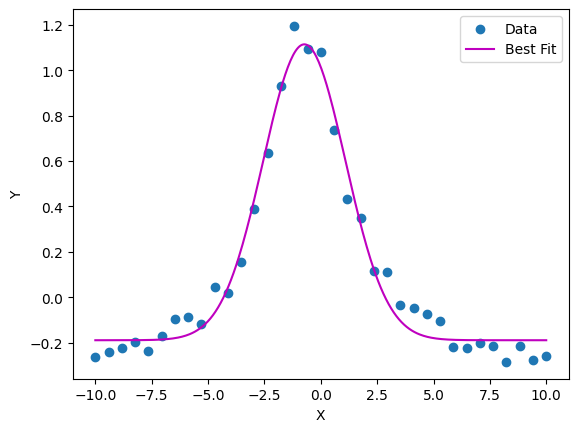

The parameters are [ 1.30281749 -0.72948082 -0.18919629  1.8238649 ], the corresponding uncertainties are [0.03987756 0.06149242 0.01692248 0.07002716]
The reduced chi square is 0.0053015992929748255


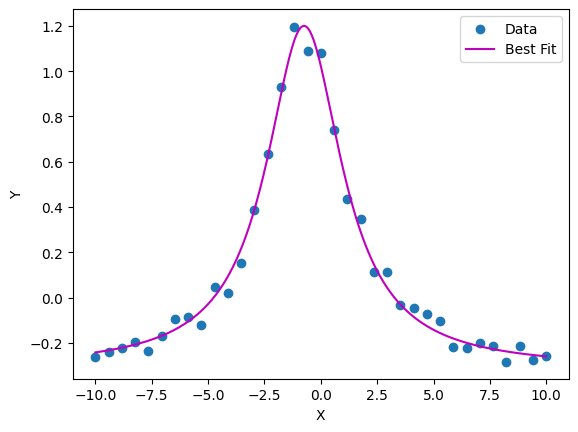

The parameters are [ 1.51372631 -0.74294488 -0.31316401  2.04588289], the corresponding uncertainties are [0.02824396 0.03694639 0.01499623 0.07509868]
The reduced chi square is 0.002039931679279019


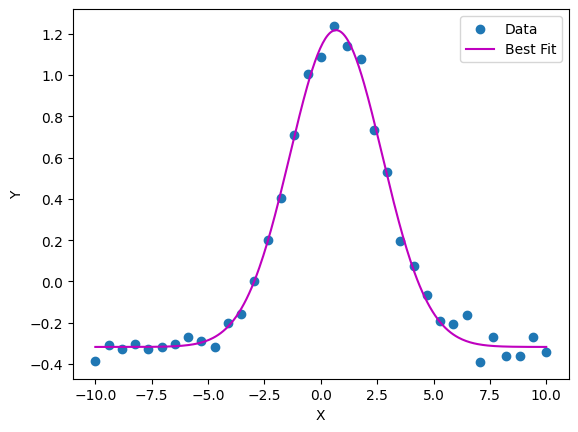

The parameters are [ 1.53422181  0.67727665 -0.31699711  2.04488197], the corresponding uncertainties are [0.02410593 0.0349878  0.01133745 0.04099728]
The reduced chi square is 0.0021229414666435195


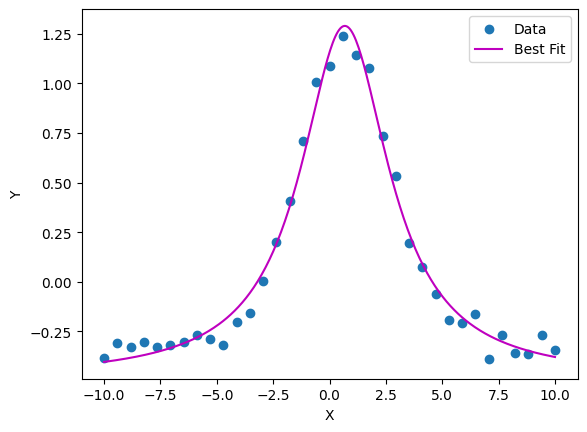

The parameters are [ 1.77679716  0.67848192 -0.48801889  2.38722299], the corresponding uncertainties are [0.04034155 0.05110768 0.02537545 0.11137714]
The reduced chi square is 0.004605889431038079


In [ ]:
gl1 = np.loadtxt('gl1.txt', skiprows = 1)
gl2 = np.loadtxt('gl2.txt', skiprows = 1)


def redChi2(x, y, error, curve, *popt):
    yfit = curve(x, *popt)
    residuals = (y - yfit) / error
    dof = len(x) - len(popt)
    chi2 = np.sum(residuals**2)
    redChi2 = chi2 / dof
    return redChi2

def b5(func, data, param):
    intGuess = np.ones(param)
    X = data[:,0]
    Y = data[:, 1]
    popt, pcov = curve_fit(func, X, Y, p0=intGuess)
    perr = np.sqrt(np.diag(pcov))
    plt.scatter(X, Y, label = 'Data')
    xFit = np.linspace(min(X), max(X), np.size(X)*10)
    yFit = func(xFit, *popt)
    plt.plot(xFit, yFit, color = 'm', label = 'Best Fit')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()
    print(f"The parameters are {popt}, the corresponding uncertainties are {perr}")
    print(f"The reduced chi square is {redChi2(X, Y, np.ones(np.size(Y)), func, *popt)}")


b5(gauss, gl1, 4)
b5(lorentz, gl1, 4)

b5(gauss, gl2, 4)
b5(lorentz, gl2, 4)




The gaussian fit has a lower reduced chi square for the second data, consequently it is the better fit for both sets of data.

**7. Resonance in a LRC Circuit**

(a) *(5 points)* Read in two data files named `P182_LRC_resonance1.csv` and `P182_LRC_resonance2.csv`, and store them as two separate data arrays.  Slice these arrays into separate x and y values, and plot them on the same plot. Using the Lorentzian fit function you defined in Exercise 6, separately create model fits to both.  Print out the fit parameters and their uncertainties, and the corresponding $\chi^2_r$ values for each fit.

The parameters are [7.15426647e-01 1.40965344e+03 9.55926239e-02 2.38238429e+02], the corresponding uncertainties are [ 0.02429926  7.7543133   0.02142655 17.90421843]
The reduced chi square is 0.001963677055038661
The parameters are [4.68833007e-01 1.39736845e+03 3.63310739e-02 1.01173187e+02], the corresponding uncertainties are [0.01265208 3.99143048 0.00689996 5.76920382]
The reduced chi square is 0.0009044875978163095


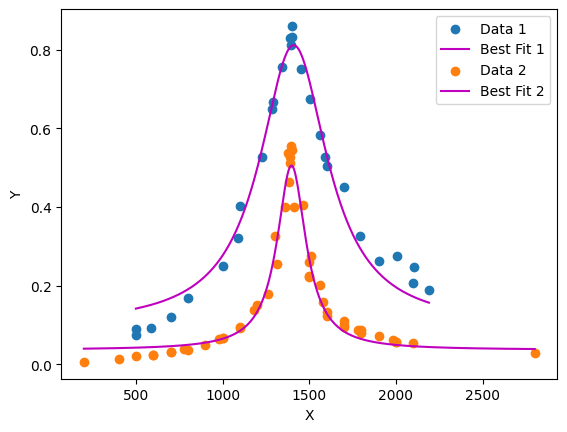

In [ ]:
def lorentz(x, A, x0, B, w):
    return (A) / (1 + (((x - x0) / w) * ((x - x0) / w))) + B

res1 = np.loadtxt('P182_LRC_resonance1.csv', delimiter=',', skiprows=2)
res2 = np.loadtxt('P182_LRC_resonance2.csv', delimiter=',', skiprows=2)

def a7(func, data, param, num):
    intGuess = [1, 1, 1, 1500]
    X = data[:,0]
    Y = data[:, 1]
    popt, pcov = curve_fit(func, X, Y, p0=intGuess)
    perr = np.sqrt(np.diag(pcov))
    plt.scatter(X, Y, label = f'Data {num}')
    xFit = np.linspace(min(X), max(X), np.size(X)*10)
    yFit = func(xFit, *popt)
    plt.plot(xFit, yFit, color = 'm', label = f'Best Fit {num}')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    print(f"The parameters are {popt}, the corresponding uncertainties are {perr}")
    print(f"The reduced chi square is {redChi2(X, Y, np.ones(np.size(Y)), func, *popt)}")

a7(lorentz, res1, 4, 1)
a7(lorentz, res2, 4, 2)




(b) *(5 points)* These data represent two sets of experimental measurements, carried out by students in Physics 182, of the resonance response in an inductor-resistor-capacitor, or LRC circuit, with one of the physical elements (L, R, C) changing. Looking at the parameter values generated, which parameter changes the most from one fit to the next? What does this imply in terms of the physical values of R, L and C? Explain in a markdown cell.

The width has the greatest net change. This suggests that the resistance is different between the two trials.

**8. Use complex numbers to analyze an AC circuit.** *(10 points)*

An AC (alternating-current) circuit is an electronic circuit in which the voltages and currents are oscillating functions of time, for example:
\begin{align*}
i(t) &= I_0\cos(\omega t + \phi_I) \quad \text{current through a resistor,}\\
v(t) &= V_0\cos(\omega t + \phi_V) \quad \text{voltage across the resistor.}
\end{align*}

The angular frequency $\omega = 2\pi f$ is the same for all parts of the circuit.

A standard way to deal with the algebra is to represent the time-dependent oscillating currents and voltages by \textbf{complex numbers $I,V$ that don't depend on time}.~\footnote{
The amplitude and phase of the complex number $I$ are used to represent the amplitude $I_0$ and phase $\phi_I$ of $i(t)$.
The formula to get $i(t)$ back from the time-independent $I$ is $i(t) = \mbox{Re}[I \exp(i\omega t)]$

, but this is not needed for this problem.}

Using $I,V$ in place of the usual (real) currents and voltages $i(t),v(t)$, we analyze an AC circuit as if it were a DC (time-independent) circuit.  

We use Ohm's law $I = V/R$ and Kirchhoff's rules.  that the sum of all the currents into a junction must be zero.
The only difference is that in place of the resistance $R$, for capacitors and inductors we use the ``impedance'' $Z$ which is a complex number given by:
\begin{align*}
Z_L &= i\omega L &\mbox{for an inductor with inductance $L$,}\\
Z_C &= \frac{1}{i\omega C} &\mbox{for a capacitor with capacitance $C$.}
\end{align*}
The current is given by Ohm's law with the resistance replaced by the total impedance: $I=V/Z_t$, where the effective impedance $Z_t$ depends on the circuit.  Given $V$, you compute $Z_t$ as a complex, frequency-dependent quantity, then plot $I=V/Z_t$ as a function of frequency $f=\omega/2\pi$.  

The circuit you will analyze is a series RLC circuit. Since resistor $R$, inductor $L$, and capacitor $C$ are in \textbf{series}, the total impedance of the circuit is the sum of the three individual impedances, $Z_t = R + Z_L + Z_C$.

Generate an array of frequencies over the range $f = 10$ - 250~kHz,  calculate the total impedance $Z_t$ and the current $I = V/Z_t$ over this range and then plot, on the same graph, the real and imaginary parts of $I = V/Z$ as a function of frequency $f $.  The plot should appear as shown below. Be sure to include axes labels, a title, and legends using \verb7plt.legend()7.

Notice that the resonance peak in Re[$I$] is at the special frequency $f_0 = 1/(2\pi\sqrt{LC}) = 119$~kHz, which is the natural frequency of a  pure LC circuit (which is analogous to a simple harmonic oscillator).

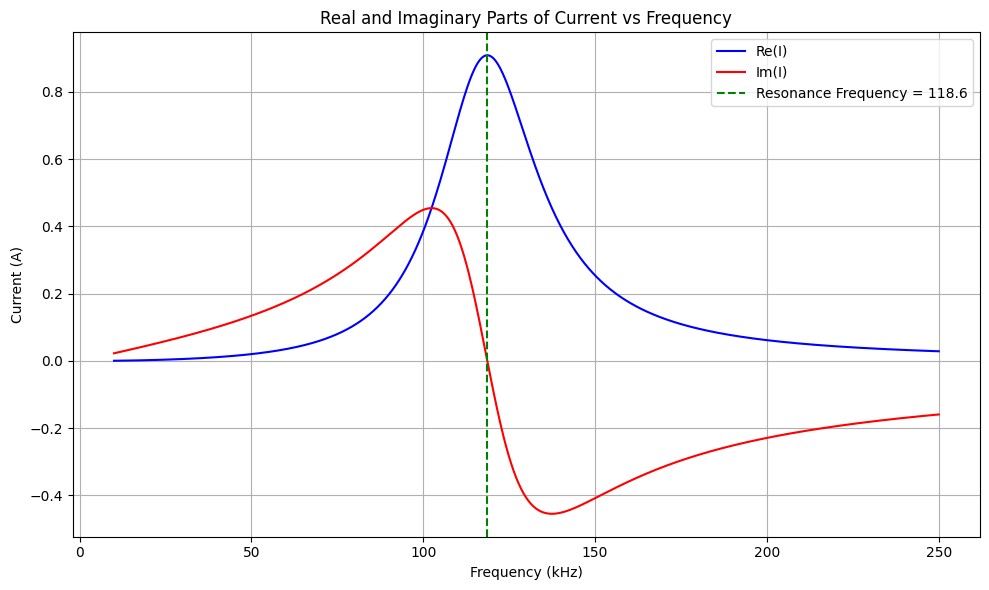

In [ ]:

R = 33
L = 150e-6
C = 12e-9
V = 30.0

f = np.linspace(10e3, 250e3, 1000)
omega = 2 * np.pi * f

Z_R = R
Z_L = 1j * omega * L
Z_C = 1 / (1j * omega * C)

Z_total = Z_R + Z_L + Z_C

I = V / Z_total

plt.figure(figsize=(10, 6))
plt.plot(f / 1e3, I.real, label='Re(I)', color='blue')
plt.plot(f / 1e3, I.imag, label='Im(I)', color='red')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Current (A)')
plt.title('Real and Imaginary Parts of Current vs Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()

peak_index = np.argmax(I.real)
resonance_frequency = f[peak_index]
plt.axvline(x=resonance_frequency / 1e3, color='green', linestyle='--', label=f'Resonance Frequency = {(resonance_frequency/1e3):.1f} Hz')
plt.legend()

plt.show()


**9. Simulating Radioactive Decay**  *(15 points)*
In Exercises 3 and 4, you looked at data from a radioactive decay experiment. Here, you will do a simple Monte Carlo simulation of the decay of a population of atoms.

Consider $N$ atoms of a radioactive element of decay lifetime $\tau$. The probability that a given nucleus will decay in time $\Delta t$ is $p = \Delta t/\tau$. Track the population of undecayed nuclei as a function of time using the following procedure.:

- Divide the total time over which you wish to compute the decay into `nsteps` equal intervals of size $\Delta t$.
- Store the number of undecayed atoms in an integer array of size  `nsteps`
- At each time step, use the following Monte Carlo procedure to decide if a given nucleus should decay. Pick a random number $r$ using `rng.random()`, and if the probability $p >r$, the nucleus should decay (i.e. the number of undecayed nuclei drops by 1).  Loop over all undecayed nuclei at each time step.
- Run this entire simulation a few times, say for 10 trials, i.e. starting from the same starting number of nuclei. This should be equivalent to having 10 different experiments.
- Once complete, plot the number of undecayed nuclei as a function of time for each of your trials using points. What shape does this have? Does it resemble your radioactive decay plots from earlier?


Start with $N_0 = 1000$ $^{14}C$ nuclei which have lifetime of 8267 years.  Track the decay over a period of 20,000 years in `nsteps = 200` timesteps.

*(5 points)* **Bonus:** average over trials and fit the data to an exponential decay and extract the half life of $^{14}C$. The half life is defined as the time taken for the number of radioactive nuclei to drop by 50 \%.

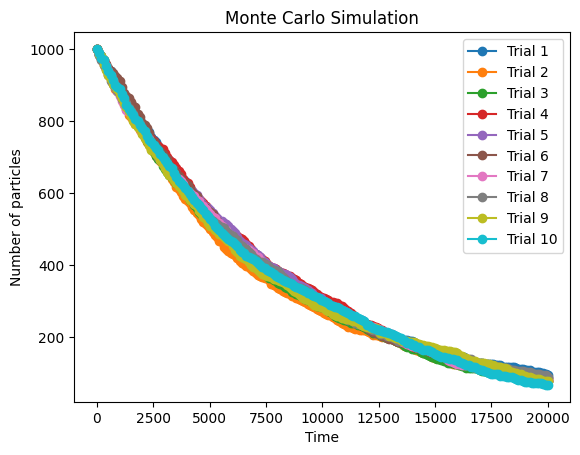

In [19]:
def monteCarlo(n0, tau, nsteps, ntrials, totalTime):
    results = np.zeros((ntrials, nsteps))
    step = totalTime / nsteps
    rng = np.random.default_rng()
    for trial in range(ntrials):
        n = n0
        population = np.zeros(nsteps)
        for t in range(nsteps):
            population[t]=n
            r = rng.random(n)
            p = step/tau
            n-=np.sum(r<p)
        results[trial, :] = population
    X = np.linspace(0, totalTime, nsteps)
    count = 1
    for Y in results:
        plt.plot(X, Y, marker='o', linestyle='-', label = f'Trial {count}', )
        count +=1
    plt.title("Monte Carlo Simulation")
    plt.xlabel("Time")
    plt.legend()
    plt.ylabel("Number of particles")
    plt.show()
    return results

    
results = monteCarlo(1000, 8267, 200, 10, 20000)

[1.99999999e+00 9.99999993e-01 1.33416755e-15]
[1.06804855e+16 5.34026157e+15 4.69886762e+04]


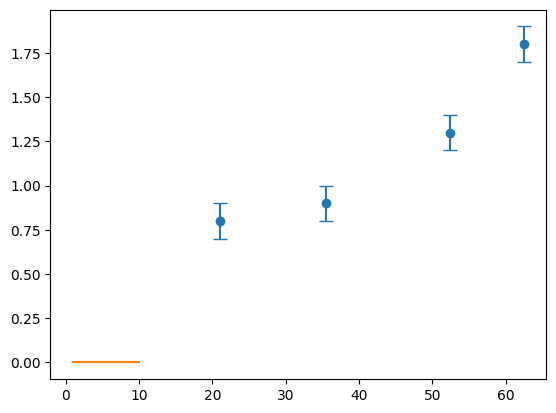

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Given data
x_data = np.array([21.1, 35.52, 52.46, 62.50])  # Temperatures in Celsius
y_data = np.array([0.8, 0.9, 1.3, 1.8])  # Volume changes of hydrogen in mL
yerr = 0.1  # Uncertainty in y_data (constant for all points)

plt.errorbar(x_data, y_data, yerr, fmt = 'o', capsize = 5)

def poly(X, a, b, c):
    return c*np.exp(a/b * X)

popt, pcov = curve_fit(poly, x_data, y_data, sigma = yerr, p0 = [2, 1, 1])
xFit = np.linspace(min(X), max(X), 1000)
yFit = poly(xFit, *popt)
plt.plot(xFit, yFit)

print(popt)
print(np.sqrt(np.diag(pcov)))